In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-08-16 07:49:28.982540: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
# mu_neg = np.log10(50)
# mu_pos = np.log10(70000)

# sigma_neg = 2.0
# sigma_pos = 2.0

# a = np.log10(10**(mu_pos) - 10**mu_neg)

mu_neg = np.log10(50)
mu_pos = np.log10(50000)

# mu_pos = 15.0 kd_WT = 1.0208168951388276e-05, trains well, scale kindof off.
# mu_pos = 12.5 kd_WT = 1.2361944572128138e-08
#mu_pos = 11.5 # Kd_WT = 1.6880063531355497e-10
#mu_pos = 11.0 # Kd_WT = 2.1441348615444062e-11
# mu_pos = 10 # kd_WT = 3.6290623182157056e-14, trains well but scale of
# mu_pos = 7.5 # trains well-ish but scale is really off
#mu_pos = 5.0 # doesn't work


# mu_pos = 11.5 # kd_WT = 4.09167643846012e-11
# mu_neg = 3 # kd_WT = 4.09167643846012e-11

mu_neg = 2.5
mu_pos = 7.5

sigma_neg = 2.0
sigma_pos = 2.0


a = np.log10(10**(mu_pos) - 10**mu_neg)

# a = 20, inference works, but scale of kd is off.

In [14]:
a

7.499995657033466

In [15]:
mu_pos, mu_neg

(7.5, 2.5)

In [16]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [17]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [18]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         c=cs[mp_idx],
                                                         a=a,
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [19]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [20]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [21]:
#y_train[y_cols_2]

In [22]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Data shuffled.
Time to set data: 32.7 sec.


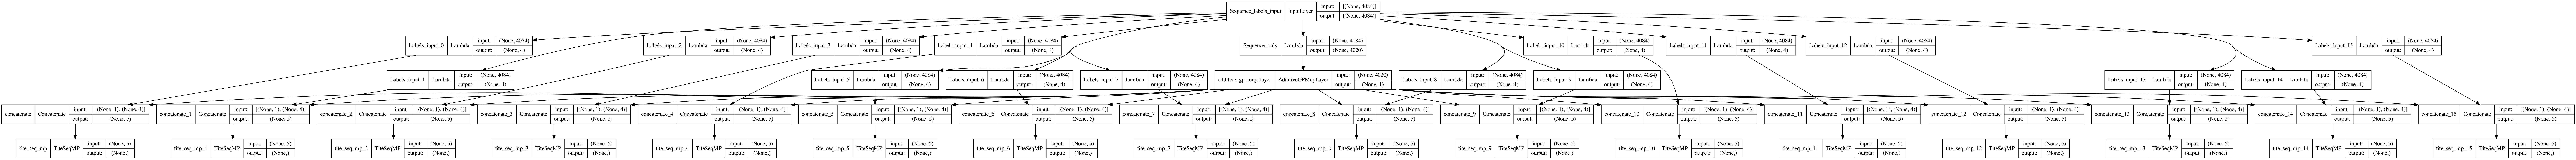

In [23]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [ ]:

# Fit model to data
model.fit(learning_rate=.001,
          epochs=50,
          batch_size=400,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/50
332/332 [==============================] - 30s 50ms/step - loss: 4606705.0000 - tite_seq_mp_loss: 1580579.6250 - tite_seq_mp_1_loss: 269362.5000 - tite_seq_mp_2_loss: 271299.4688 - tite_seq_mp_3_loss: 317080.5312 - tite_seq_mp_4_loss: 265537.0312 - tite_seq_mp_5_loss: 265673.0312 - tite_seq_mp_6_loss: 274185.9688 - tite_seq_mp_7_loss: 212189.9375 - tite_seq_mp_8_loss: 177589.7500 - tite_seq_mp_9_loss: 148110.9531 - tite_seq_mp_10_loss: 147664.9844 - tite_seq_mp_11_loss: 188247.7031 - tite_seq_mp_12_loss: 135728.4844 - tite_seq_mp_13_loss: 108218.5859 - tite_seq_mp_14_loss: 111652.1797 - tite_seq_mp_15_loss: 133584.7031 - I_var: -2.1271 - val_loss: 3503198.2500 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 106089.8984 - val_tite_seq_mp_2_loss: 111608.2656 - val_tite_seq_mp_3_loss: 153072.0781 - val_tite_seq_mp_4_loss: 120051.9844 - val_tite_seq_mp_5_loss: 131071.4297 - val_tite_seq_mp_6_loss: 143165.0312 - val_tite_seq_mp_7_loss: 138392.6406 - val_tite_seq_mp

332/332 [==============================] - 7s 22ms/step - loss: 3588410.5000 - tite_seq_mp_loss: 1580608.1250 - tite_seq_mp_1_loss: 110404.6328 - tite_seq_mp_2_loss: 105419.3047 - tite_seq_mp_3_loss: 142309.0312 - tite_seq_mp_4_loss: 114272.9375 - tite_seq_mp_5_loss: 130866.5625 - tite_seq_mp_6_loss: 145498.5625 - tite_seq_mp_7_loss: 143445.8906 - tite_seq_mp_8_loss: 145142.2344 - tite_seq_mp_9_loss: 143510.8906 - tite_seq_mp_10_loss: 145693.5938 - tite_seq_mp_11_loss: 184658.2031 - tite_seq_mp_12_loss: 137747.8906 - tite_seq_mp_13_loss: 111151.9453 - tite_seq_mp_14_loss: 112788.5078 - tite_seq_mp_15_loss: 134892.0781 - I_var: -2.1682 - val_loss: 3448082.0000 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 106129.3984 - val_tite_seq_mp_2_loss: 100423.4453 - val_tite_seq_mp_3_loss: 133807.4219 - val_tite_seq_mp_4_loss: 108318.6641 - val_tite_seq_mp_5_loss: 124556.6172 - val_tite_seq_mp_6_loss: 139614.4688 - val_tite_seq_mp_7_loss: 136700.8594 - val_tite_seq_mp_8_loss: 137

332/332 [==============================] - 7s 21ms/step - loss: 3530711.5000 - tite_seq_mp_loss: 1580601.6250 - tite_seq_mp_1_loss: 116289.9453 - tite_seq_mp_2_loss: 103517.5156 - tite_seq_mp_3_loss: 129036.4453 - tite_seq_mp_4_loss: 102296.1172 - tite_seq_mp_5_loss: 119976.1797 - tite_seq_mp_6_loss: 136655.7656 - tite_seq_mp_7_loss: 136750.0469 - tite_seq_mp_8_loss: 140661.2969 - tite_seq_mp_9_loss: 140741.5000 - tite_seq_mp_10_loss: 144438.9531 - tite_seq_mp_11_loss: 183768.7031 - tite_seq_mp_12_loss: 137421.8750 - tite_seq_mp_13_loss: 110989.8906 - tite_seq_mp_14_loss: 112708.0156 - tite_seq_mp_15_loss: 134856.5781 - I_var: -2.1673 - val_loss: 3400396.7500 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 113306.3672 - val_tite_seq_mp_2_loss: 100389.9609 - val_tite_seq_mp_3_loss: 123243.3672 - val_tite_seq_mp_4_loss: 98325.5156 - val_tite_seq_mp_5_loss: 114647.1797 - val_tite_seq_mp_6_loss: 131327.0781 - val_tite_seq_mp_7_loss: 130278.1953 - val_tite_seq_mp_8_loss: 1334

332/332 [==============================] - 7s 21ms/step - loss: 3495165.2500 - tite_seq_mp_loss: 1580565.0000 - tite_seq_mp_1_loss: 123123.1484 - tite_seq_mp_2_loss: 106589.3047 - tite_seq_mp_3_loss: 125766.8672 - tite_seq_mp_4_loss: 97827.5938 - tite_seq_mp_5_loss: 113424.5078 - tite_seq_mp_6_loss: 129914.0859 - tite_seq_mp_7_loss: 129914.8125 - tite_seq_mp_8_loss: 134766.4531 - tite_seq_mp_9_loss: 136191.0781 - tite_seq_mp_10_loss: 141784.7656 - tite_seq_mp_11_loss: 181658.2031 - tite_seq_mp_12_loss: 136325.0781 - tite_seq_mp_13_loss: 110371.9141 - tite_seq_mp_14_loss: 112335.6641 - tite_seq_mp_15_loss: 134603.6094 - I_var: -2.1612 - val_loss: 3376986.2500 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 124703.5156 - val_tite_seq_mp_2_loss: 106319.8281 - val_tite_seq_mp_3_loss: 121726.9141 - val_tite_seq_mp_4_loss: 95493.1641 - val_tite_seq_mp_5_loss: 108804.5469 - val_tite_seq_mp_6_loss: 125061.7422 - val_tite_seq_mp_7_loss: 123578.8906 - val_tite_seq_mp_8_loss: 12753

332/332 [==============================] - 7s 21ms/step - loss: 3476095.2500 - tite_seq_mp_loss: 1580605.8750 - tite_seq_mp_1_loss: 130335.0859 - tite_seq_mp_2_loss: 110776.3906 - tite_seq_mp_3_loss: 127066.0234 - tite_seq_mp_4_loss: 97932.5078 - tite_seq_mp_5_loss: 110946.2969 - tite_seq_mp_6_loss: 126102.9922 - tite_seq_mp_7_loss: 124473.6875 - tite_seq_mp_8_loss: 128920.4609 - tite_seq_mp_9_loss: 131228.2031 - tite_seq_mp_10_loss: 138509.5938 - tite_seq_mp_11_loss: 179094.0625 - tite_seq_mp_12_loss: 134844.0469 - tite_seq_mp_13_loss: 109436.6875 - tite_seq_mp_14_loss: 111700.4609 - tite_seq_mp_15_loss: 134119.0000 - I_var: -2.1487 - val_loss: 3364753.5000 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 128850.5391 - val_tite_seq_mp_2_loss: 109636.9688 - val_tite_seq_mp_3_loss: 123062.6484 - val_tite_seq_mp_4_loss: 96043.8750 - val_tite_seq_mp_5_loss: 107229.7109 - val_tite_seq_mp_6_loss: 122793.7969 - val_tite_seq_mp_7_loss: 120044.4297 - val_tite_seq_mp_8_loss: 12345

332/332 [==============================] - 7s 22ms/step - loss: 3463002.5000 - tite_seq_mp_loss: 1580602.3750 - tite_seq_mp_1_loss: 134934.6250 - tite_seq_mp_2_loss: 115104.4766 - tite_seq_mp_3_loss: 130072.4141 - tite_seq_mp_4_loss: 99186.5078 - tite_seq_mp_5_loss: 110195.4453 - tite_seq_mp_6_loss: 124621.4141 - tite_seq_mp_7_loss: 121000.4297 - tite_seq_mp_8_loss: 124062.4297 - tite_seq_mp_9_loss: 126328.6562 - tite_seq_mp_10_loss: 134815.7031 - tite_seq_mp_11_loss: 176018.8594 - tite_seq_mp_12_loss: 133150.4531 - tite_seq_mp_13_loss: 108368.1719 - tite_seq_mp_14_loss: 110990.9375 - tite_seq_mp_15_loss: 133546.1250 - I_var: -2.1372 - val_loss: 3355066.0000 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 129586.8906 - val_tite_seq_mp_2_loss: 110817.4688 - val_tite_seq_mp_3_loss: 124531.3984 - val_tite_seq_mp_4_loss: 97160.0781 - val_tite_seq_mp_5_loss: 106717.2500 - val_tite_seq_mp_6_loss: 121927.5156 - val_tite_seq_mp_7_loss: 117764.6562 - val_tite_seq_mp_8_loss: 12055

332/332 [==============================] - 7s 22ms/step - loss: 3454903.0000 - tite_seq_mp_loss: 1580608.7500 - tite_seq_mp_1_loss: 137229.8906 - tite_seq_mp_2_loss: 117857.4609 - tite_seq_mp_3_loss: 132027.2500 - tite_seq_mp_4_loss: 102225.6016 - tite_seq_mp_5_loss: 111257.1484 - tite_seq_mp_6_loss: 125080.2500 - tite_seq_mp_7_loss: 119141.1016 - tite_seq_mp_8_loss: 121046.8047 - tite_seq_mp_9_loss: 122832.2109 - tite_seq_mp_10_loss: 131436.3125 - tite_seq_mp_11_loss: 172959.9688 - tite_seq_mp_12_loss: 131052.1328 - tite_seq_mp_13_loss: 106929.1641 - tite_seq_mp_14_loss: 110199.0859 - tite_seq_mp_15_loss: 133012.7031 - I_var: -2.1258 - val_loss: 3354254.7500 - val_tite_seq_mp_loss: 1531751.1250 - val_tite_seq_mp_1_loss: 133123.9531 - val_tite_seq_mp_2_loss: 114676.2578 - val_tite_seq_mp_3_loss: 127546.9844 - val_tite_seq_mp_4_loss: 98693.5156 - val_tite_seq_mp_5_loss: 106658.8828 - val_tite_seq_mp_6_loss: 121259.3047 - val_tite_seq_mp_7_loss: 115912.6328 - val_tite_seq_mp_8_loss: 1179

 27/332 [=>............................] - ETA: 5s - loss: 3616911.2500 - tite_seq_mp_loss: 1726229.3750 - tite_seq_mp_1_loss: 136939.5469 - tite_seq_mp_2_loss: 120930.5469 - tite_seq_mp_3_loss: 137953.3438 - tite_seq_mp_4_loss: 105696.5781 - tite_seq_mp_5_loss: 115482.8203 - tite_seq_mp_6_loss: 132132.9844 - tite_seq_mp_7_loss: 119709.6172 - tite_seq_mp_8_loss: 116562.3203 - tite_seq_mp_9_loss: 117136.5469 - tite_seq_mp_10_loss: 122860.8750 - tite_seq_mp_11_loss: 172808.5938 - tite_seq_mp_12_loss: 136313.7500 - tite_seq_mp_13_loss: 108925.7734 - tite_seq_mp_14_loss: 112238.9844 - tite_seq_mp_15_loss: 134981.2500 - I_var: -2.0904

In [ ]:

# # Fit model to data
# model.fit(learning_rate=.0005,
#           epochs=500,
#           batch_size=400,
#           try_tqdm = False,
#           early_stopping=False,
#           early_stopping_patience=10,
#           linear_initialization=False)a

In [ ]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [ ]:
model.history['loss'][-1]/1e6

In [ ]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [ ]:
theta

In [ ]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-15, 15]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, c = {cs[mp_counter]:.3e}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig(f'ace2rbd_Titeseq_measurment_prcoess_mu_pos_{(mu_pos):.3f}.png',dpi=300,bbox_inches='tight')


In [ ]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


In [ ]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

In [ ]:
theta_df = pd.DataFrame(theta,columns=alphabet)

In [ ]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [ ]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

In [ ]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

In [ ]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

In [ ]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                #clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [ ]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')

In [ ]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Discrete monotonic G-P map')
plt.title(f'Titeseq measurement vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
plt.ylabel('Titeseq G-P map')
plt.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [ ]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [ ]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

In [ ]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

### Compute $K_d$ values

In [ ]:
#phi = gpmap.x_to_phi(x_test)

#a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [ ]:
def _x_to_mat(x, alphabet):
    return (np.array(list(x))[:, np.newaxis] == alphabet[np.newaxis, :]).astype(float)

In [ ]:
WT_seq = model.x_stats['consensus_seq']

single_mutants = []

for idx,WT_char in enumerate(WT_seq):
    #print(idx)
    for mutant in model.alphabet:
#         if mutant==WT_seq[idx]:
#             continue
#         else:
        temp_WT_list = list(WT_seq)
        temp_WT_list[idx] = mutant
        single_mutant = ''.join(temp_WT_list)
        single_mutants.append(single_mutant)
            

In [ ]:
phi_single_mutants = gpmap.x_to_phi(single_mutants)

In [ ]:
mavenn2_Kd = pd.DataFrame(1/(10**phi_single_mutants.reshape(201,20)),columns=model.alphabet)

In [ ]:
# fig, axs = plt.subplots(1,2,figsize=(10,5))


# #lims=[10**-12,10**-1]
# #ax.plot(lims,lims,'--',color='orange')

# #Rsq = np.corrcoef(10**bloom_bind_df.values.ravel(),10**(phi_single_mutants))[0,1]**2
# ax = axs[0]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_bind_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)


# ax = axs[1]
# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(10**bloom_exp_df.values.ravel(),
#            10**(phi_single_mutants),
#             color='blue',s=5,alpha=0.25)
# ax.set_xscale('log')
# ax.set_yscale('log')

# ax.set_xlabel('Expression (Starr et al)',fontsize=14)
# ax.set_ylabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(2,1,figsize=(15,10))
from matplotlib.colors import LogNorm

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=-10**-9, vcenter=10**-6.5, vmax=10**-5)
#pcolormesh(your_data, cmap="coolwarm", norm=divnorm)

data = (bloom_bind_df.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))
ax = axs[0]
sns.heatmap((bloom_bind_df.values.T),
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$\log_{{10}}(K_d)$, 1H - (Starr)')
#ax.set_yticklabels(Adams_ordering,rotation=0)



ax = axs[1]
data = np.log10(mavenn2_Kd.values.ravel())
log_norm = LogNorm(vmin=min(data), vmax=max(data))

sns.heatmap(np.log10(mavenn2_Kd.values.T)+7,
            ax=ax,
            cmap='RdBu',
            #norm=log_norm
            #norm=divnorm
            #norm=norm
           )

ax.set_xticks(np.arange(0,201,5))
ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
ax.tick_params(axis='y', which='major', pad=10)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
ax.set_title(f'$K_d$, 1H - (MAVE-NN2)')
#ax.set_yticklabels(Adams_ordering,rotation=0)

fig.tight_layout()
# fig.savefig('pngs/Titeseq_MP/Adams_Kd_vs_Mavenn2_Kd_heatmaps.png',
#             facecolor='white', edgecolor='none',
#             dpi=200,bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(mavenn2_Kd.values.ravel(),10**bloom_bind_df.values.ravel()
            ,s=5,alpha=0.5,color='blue')
ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_ylabel('$\log_{10}(K_d)$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$\log_{10}(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

ax.set_ylabel('$(K_d)$ (Starr et al)',fontsize=14)
ax.set_xlabel('$(K_d)$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)

In [ ]:
# fig, ax = plt.subplots(figsize=(5,5))


# # lims=[10**-12,10**-1]
# # ax.plot(lims,lims,'--',color='orange',lw=2)

# Rsq = np.corrcoef(1/(10**((phi_single_mutants))),
#             10**(bloom_bind_df.values.ravel()))[0,1]**2

# #ax.set_title(f'$R^2$ = {Rsq:.3f}')
# ax.scatter(np.log10(1/10**((phi_single_mutants))),
#            (bloom_bind_df.values.ravel()),
#             color='blue',s=5,alpha=0.25)
# #ax.set_xscale('log')
# #ax.set_yscale('log')

# ax.set_ylabel('$K_d$ (Starr et al)',fontsize=14)
# ax.set_xlabel('$K_d$, MAVE-NN, ${{\\rm exp}_{10}(\phi)}^{-1}$',fontsize=14)
# # ax.set_xlim(lims)
# # ax.set_ylim(lims)
# fig.tight_layout()
# # fig.savefig('pngs/__/__.png',
# #             facecolor='white', edgecolor='none',
# #             dpi=200,bbox_inches='tight')


In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

phi_WT = gpmap.x_to_phi(WT_seq)
cs_ = np.arange(10**-13,10**-7,10**(-11))
cs_course = np.arange(10**-12,10**-1,10**(-7))
cs_fig_1  = np.array([10**(-14),10**(-13),10**(-12),10**(-11),10**(-10),10**(-9),10**(-8),10**(-7),10**(-6)])

#for a in as_list:
#ax.plot(cs_course,(mu_of_phi(c=cs_course,a=a,phi=phi_WT)),lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    
ax.plot(cs_fig_1,(mu_of_phi(c=cs_fig_1,a=a,phi=phi_WT)),'ro--',lw=3,zorder=10,label=f'$A(\phi) = {(10**a):.1e}$')    

ax.set_xlabel('Concentration [M]',fontsize=12)
ax.set_ylabel('$\mu(\phi = \phi_{\\rm WT})$',fontsize=15)

Kd_WT = 1/(10**phi_WT)
ax.axvline(Kd_WT,color='black',lw=3,label=f'$K_d (WT) = {(Kd_WT):2e}$')
for c in cs:    
    ax.axvline(c,c='gray',zorder=-10,alpha=0.4)
    
ax.axvline(c,c='gray',label=f'Conc. for each MP',zorder=-10,alpha=0.0)    

leg = ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
for lh in leg.legendHandles: 
    lh.set_alpha(1)


ax.set_xscale('log')
#ax.set_xlim(10**-13,max(cs))    
#ax.set_yscale('log')
ax.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

fig.savefig('mu_phi_WT_vs_conc.png',dpi=300,bbox_inches='tight')


In [ ]:
Kd_WT